# Exploring the Quantum Nature of Light with Compton Scattering

Sam Greydanus. 11 May 2017. Experimental Methods in Physics.

In [19]:
import read_chn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [80]:
data_dir = './data'

elements = ['cs', 'na', 'co']
angles = [str(i).zfill(2) for i in range(0,70,10)]
calib_files = {e : '/calib-f/{}.Chn'.format(e) for e in elements}
scatter_files = {a : '/data-f/cs_{}_scatter.Chn'.format(a) for a in angles}
control_files = {a : '/data-f/cs_{}_control.Chn'.format(a) for a in angles}

In [83]:
def load_chn(fname):    
    spec_obj    = read_chn.gamma_data(fname)
    spec_array  = spec_obj.hist_array
    spec_time   = spec_obj.real_time   
    return spec_array, spec_time

calib = {k : load_chn(data_dir + v)[0] for (k, v) in calib_files.items()}
scatter = {k : load_chn(data_dir + v)[0] for (k, v) in scatter_files.items()}
control = {k : load_chn(data_dir + v)[0] for (k, v) in control_files.items()}

In [84]:
# normalize
for e in elements:
    calib[e] = calib[e] / np.sum(calib[e])
    
for a in angles:
    scatter[a] = scatter[a] / np.sum(scatter[a])
    control[a] = control[a] / np.sum(control[a])

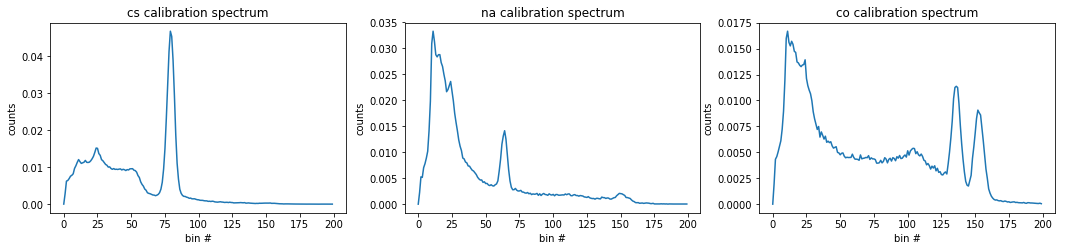

In [85]:
vplots = 1
hplots = 3
plot_i = 0
clip = 200
fs = [hplots*6, 3.5*vplots]
f1 = plt.figure(figsize=fs)
for v in range(vplots):
    for h in range(hplots):
        plot_num = 100*vplots + 10*hplots + (plot_i+1)
        
        plt.subplot(plot_num)
        plt.title(elements[plot_i] + ' calibration spectrum')
        plt.xlabel("bin #") ; plt.ylabel("counts")
        plt.plot(calib[elements[plot_i]][:clip])
        plot_i += 1
        
plt.show() ; f1.savefig("./figures/calib.pdf", bbox_inches='tight')

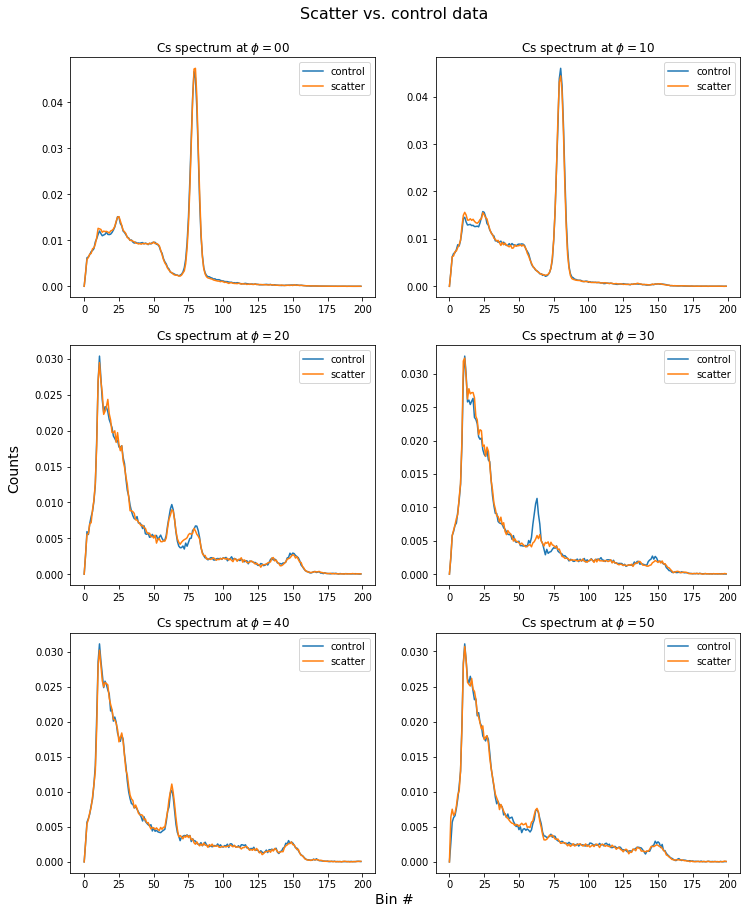

In [120]:
vplots = 3
hplots = 2
plot_i = 0
labels = []
clip = 200
fs = [hplots*6, 5*vplots]
f2 = plt.figure(figsize=fs)

f2.text(0.5, .92, 'Scatter vs. control data', ha='center', va='center', fontsize=16)
f2.text(0.5, 0.1, 'Bin #', ha='center', va='center', fontsize=14)
f2.text(0.06, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=14)

for v in range(vplots):
    for h in range(hplots):
        plot_num = 100*vplots + 10*hplots + (plot_i+1)
        
        plt.subplot(plot_num)
        plt.title('Cs spectrum at $\phi={}$'.format(angles[plot_i]))
        plt.plot(control[angles[plot_i]][:clip], label='control')
        plt.plot(scatter[angles[plot_i]][:clip], label='scatter') ; plt.legend()
        plot_i += 1
        
plt.show() ; f2.savefig("./figures/compare.pdf", bbox_inches='tight')

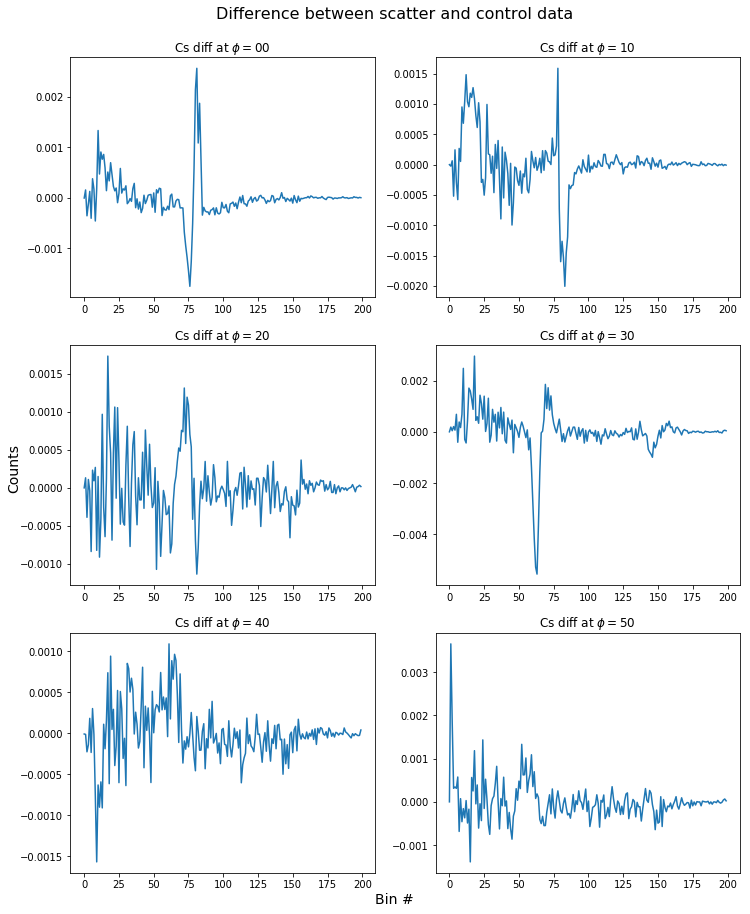

In [118]:
vplots = 3
hplots = 2
plot_i = 0
labels = []
clip = 200
fs = [hplots*6, 5*vplots]
f3 = plt.figure(figsize=fs)

f3.text(0.5, .92, 'Difference between scatter and control data', ha='center', va='center', fontsize=16)
f3.text(0.5, 0.1, 'Bin #', ha='center', va='center', fontsize=14)
f3.text(0.06, 0.5, 'Counts', ha='center', va='center', rotation='vertical', fontsize=14)

for v in range(vplots):
    for h in range(hplots):
        plot_num = 100*vplots + 10*hplots + (plot_i+1)
        
        plt.subplot(plot_num)
        plt.title('Cs diff at $\phi={}$'.format(angles[plot_i]))
        plt.plot((scatter[angles[plot_i]]-control[angles[plot_i]])[:clip])
        plot_i += 1
        
plt.show() ; f3.savefig("./figures/diffs.pdf", bbox_inches='tight')